In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<font size=5>
    Zeroth-order data exploration: data inspection
</font>

<hr style="border: solid rgb(0,0,0) 0.0px; background-color: rgb(0,0,0);height: 2.0px;"/>
<font size=4>
    Summary: 
</font>

1. Column count: 292
2. `dtypes`:  
    - 1 `datetime64[ns]` 
    - 119 `float64` 
    - 157 `int64` 
    - 15 `object`
3. Missing vals
    - seemingly all `float`s (could be due to the `np.NaN`)
    - at least 257 of 292 features have a fill rate more than 90%

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
sys.path.append('../../')#put an actual dir here!

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 20)]
random.shuffle(colors)

## Load the data

In [15]:
dataset_dir = os.path.abspath('../../../../data/')

In [16]:
df = pd.read_csv(dataset_dir + '/train.csv', \
                 infer_datetime_format=True, parse_dates=['timestamp'])

In [17]:
df.shape

(30471, 292)

### Counts and (inferred) data types

In [18]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
id                                       30471 non-null int64
timestamp                                30471 non-null datetime64[ns]
full_sq                                  30471 non-null int64
life_sq                                  24088 non-null float64
floor                                    30304 non-null float64
max_floor                                20899 non-null float64
material                                 20899 non-null float64
build_year                               16866 non-null float64
num_room                                 20899 non-null float64
kitch_sq                                 20899 non-null float64
state                                    16912 non-null float64
product_type                             30471 non-null object
sub_area                                 30471 non-null object
area_m                                   30471 non-null f

#### Create a DF out of the `info()`

This can be helpful to gather some features together,  
for instance when they have the same dtype.

An alternative is to get this directly from the df without `pd.info`, 
```python
df.select_dtypes(include='object').columns
```


In [19]:
import io
buf = io.StringIO()
df.info(verbose=True, null_counts=True, buf=buf)
s = buf.getvalue()

In [20]:
nr_cols = df.shape[1]
info_list = s.split('\n')[3:nr_cols+3]
df_info = pd.DataFrame()
for v in info_list:
    v = v.split()
    dc = {}
    dc['col'] = [v[0]]
    dc['count'] = [int(v[1])]
    dc['type'] = [v[3]]
    #print(dc)
    df_row = pd.DataFrame().from_dict(dc)
    df_info = pd.concat([df_info, df_row])
df_info.reset_index(drop=True,inplace=True)

In [21]:
df_info.head()

,col,count,type
0,id,30471,int64
1,timestamp,30471,datetime64[ns]
2,full_sq,30471,int64
3,life_sq,24088,float64
4,floor,30304,float64


In [22]:
int_cols = df_info[df_info['type']=='int64'].col.tolist()
float_cols = df_info[df_info['type']=='float64'].col.tolist()

# An alternative is to get this directly from the df without df.info
#string_cols = df_info[df_info['type']=='object'].col.tolist()
string_cols = df.select_dtypes('object').columns.tolist()

### Characterize the missing values

In [23]:
# For cols in df, get the percent missing
missing = [(c, df[c].isna().mean()*100) for c in df]
print(missing[:10])

[('id', 0.0), ('timestamp', 0.0), ('full_sq', 0.0), ('life_sq', 20.947786419874635), ('floor', 0.548062091825014), ('max_floor', 31.413475107479243), ('material', 31.413475107479243), ('build_year', 44.649010534606674), ('num_room', 31.413475107479243), ('kitch_sq', 31.413475107479243)]


In [24]:
missing

[('id', 0.0),
 ('timestamp', 0.0),
 ('full_sq', 0.0),
 ('life_sq', 20.947786419874635),
 ('floor', 0.548062091825014),
 ('max_floor', 31.413475107479243),
 ('material', 31.413475107479243),
 ('build_year', 44.649010534606674),
 ('num_room', 31.413475107479243),
 ('kitch_sq', 31.413475107479243),
 ('state', 44.498047323684816),
 ('product_type', 0.0),
 ('sub_area', 0.0),
 ('area_m', 0.0),
 ('raion_popul', 0.0),
 ('green_zone_part', 0.0),
 ('indust_part', 0.0),
 ('children_preschool', 0.0),
 ('preschool_quota', 21.94873814446523),
 ('preschool_education_centers_raion', 0.0),
 ('children_school', 0.0),
 ('school_quota', 21.93889271766598),
 ('school_education_centers_raion', 0.0),
 ('school_education_centers_top_20_raion', 0.0),
 ('hospital_beds_raion', 47.39260280266483),
 ('healthcare_centers_raion', 0.0),
 ('university_top_20_raion', 0.0),
 ('sport_objects_raion', 0.0),
 ('additional_education_raion', 0.0),
 ('culture_objects_top_25', 0.0),
 ('culture_objects_top_25_raion', 0.0),
 ('sh

In [25]:
df_miss = pd.DataFrame(missing, columns=["column_name", "percent_missing"])
df_miss = df_miss[df_miss.percent_missing > 0]
display(df_miss.sort_values("percent_missing", ascending=False).reset_index(drop=True))

,column_name,percent_missing
0,hospital_beds_raion,47.392603
1,build_year,44.649011
2,state,44.498047
3,cafe_sum_500_max_price_avg,43.585704
4,cafe_sum_500_min_price_avg,43.585704
5,cafe_avg_price_500,43.585704
6,max_floor,31.413475
7,material,31.413475
8,num_room,31.413475
9,kitch_sq,31.413475


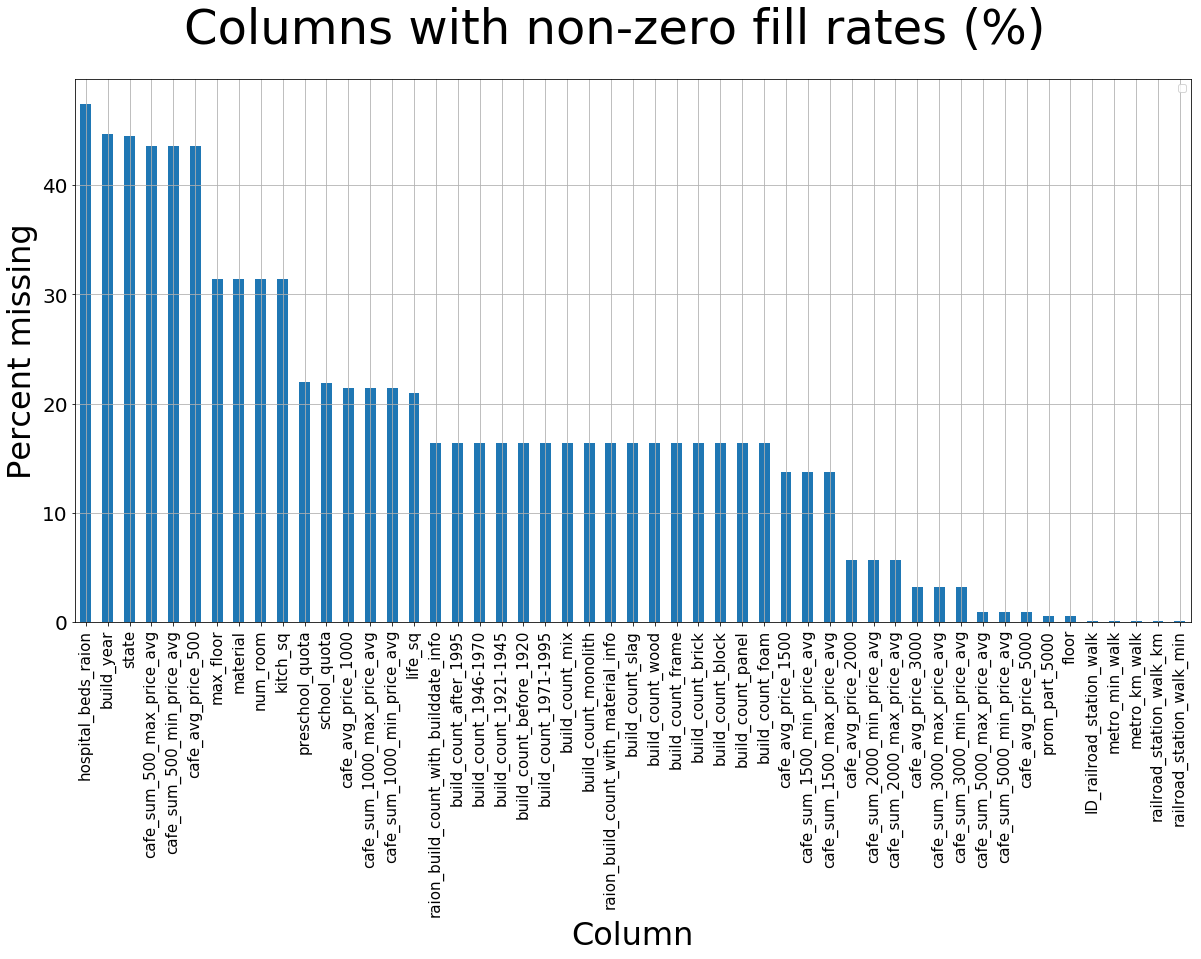

In [26]:
fig, ax = plt.subplots(1,1,figsize=[20,10])
df_miss.sort_values("percent_missing", ascending=False)\
    .plot.bar(x='column_name',y='percent_missing', ax=ax);
ax.set_xlabel('Column', fontsize=32)
ax.set_ylabel('Percent missing', fontsize=32)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=20)
fig.suptitle('Columns with non-zero fill rates (%)', fontsize=48)
ax.legend([])
ax.grid();

In [27]:
df.shape, df_miss.shape

((30471, 292), (51, 2))

In [28]:
df[df_miss.column_name.tolist()].head()

,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,preschool_quota,school_quota,...,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,prom_part_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000
0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5001.0,11065.0,...,614.29,1042.86,828.57,639.68,1079.37,859.52,13.31,708.57,1185.71,947.14
1,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3119.0,6237.0,...,695.24,1190.48,942.86,631.03,1086.21,858.62,27.47,673.81,1148.81,911.31
2,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1463.0,5580.0,...,563.64,977.27,770.45,697.44,1192.31,944.87,21.58,702.68,1196.43,949.55
3,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,6839.0,17063.0,...,660.00,1120.00,890.00,718.75,1218.75,968.75,3.89,931.58,1552.63,1242.11
4,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3240.0,7770.0,...,765.93,1269.23,1017.58,853.03,1410.45,1131.74,10.92,853.88,1411.45,1132.66


In [29]:
df[df_miss.column_name.tolist()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 51 columns):
life_sq                                  24088 non-null float64
floor                                    30304 non-null float64
max_floor                                20899 non-null float64
material                                 20899 non-null float64
build_year                               16866 non-null float64
num_room                                 20899 non-null float64
kitch_sq                                 20899 non-null float64
state                                    16912 non-null float64
preschool_quota                          23783 non-null float64
school_quota                             23786 non-null float64
hospital_beds_raion                      16030 non-null float64
raion_build_count_with_material_info     25480 non-null float64
build_count_block                        25480 non-null float64
build_count_wood                         25480 non-null flo

In [30]:
missing_col_names = df_miss.column_name.values.tolist() + ['price_doc']
all_cols = df.columns.tolist()

Finally, get all columns with a zero miss rate $\leadsto$ keeps most cols

In [31]:
all_full_cols = [item for item in all_cols if item not in missing_col_names]

### Missing values: is there a pattern?

In [33]:
from helpers.fill_rates import get_column_fill_rates, get_row_fill_rates

In [35]:
import seaborn as sns

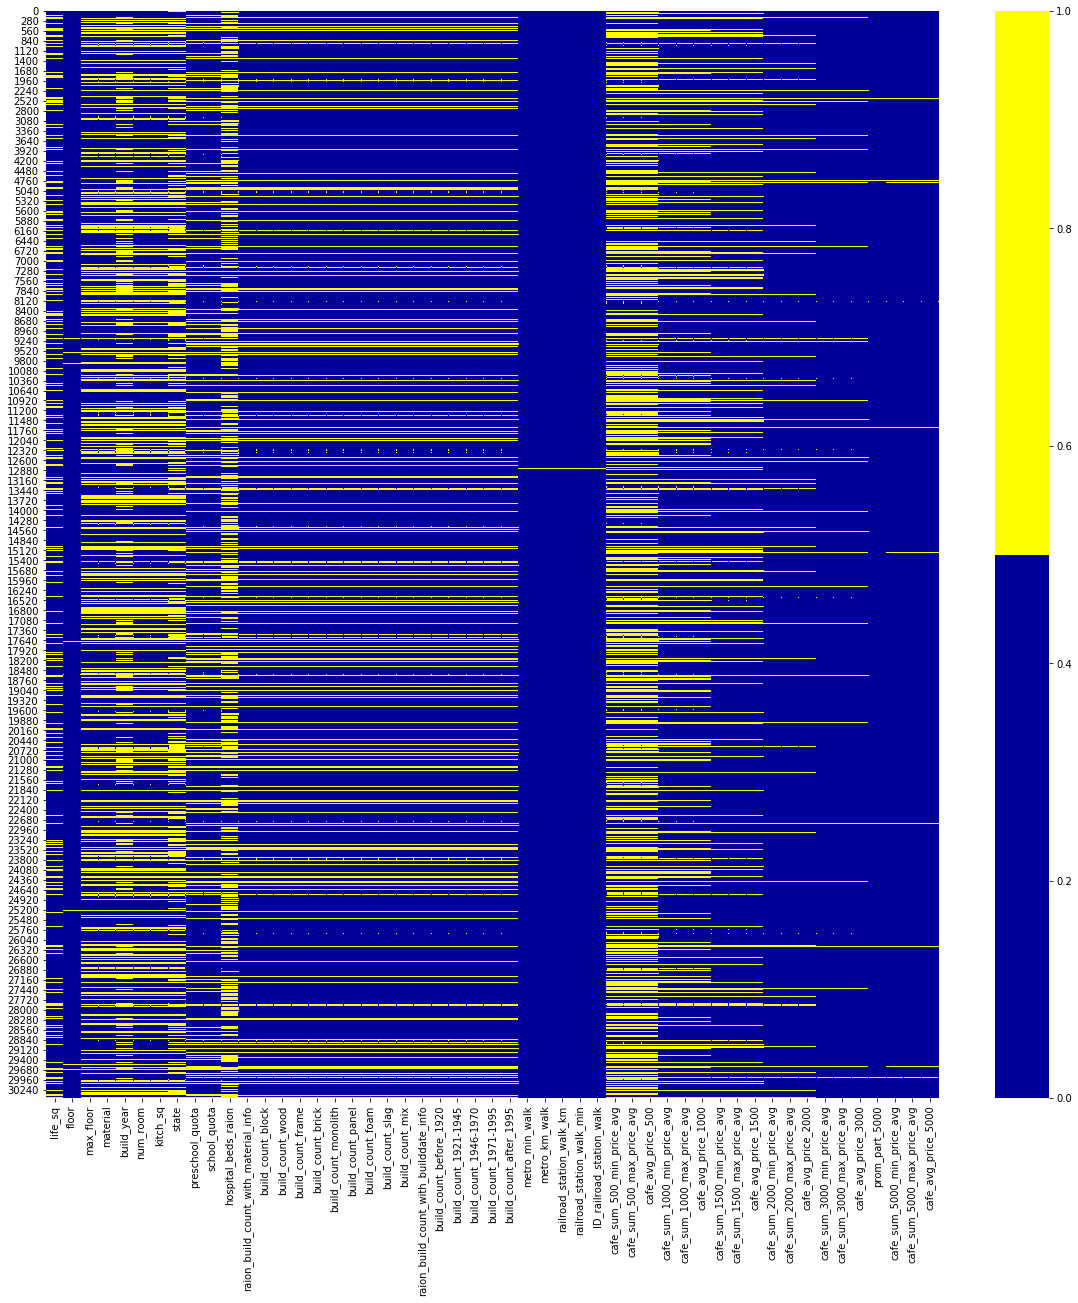

In [36]:
df_fillrates = get_column_fill_rates(df,0.0)
unfilled_cols = df_fillrates[df_fillrates['frac_full']!=1.0]['column_name'].tolist()

plt.figure(figsize=[20,20])
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[unfilled_cols].isnull().sample(frac=1).reset_index(drop=True), cmap=sns.color_palette(colours))

#### Check the fill rate of the columns (features)

Keep all features having more than 90% (arbitrary) of their values

In [38]:
threshold = 0.90
df_fillrates = get_column_fill_rates(df,threshold)
display(df_fillrates.sort_values("frac_full", ascending=True)[:10])

,column_name,frac_full
229,cafe_sum_2000_min_price_avg,0.943389
230,cafe_sum_2000_max_price_avg,0.943389
231,cafe_avg_price_2000,0.943389
252,cafe_sum_3000_min_price_avg,0.967477
254,cafe_avg_price_3000,0.967477
253,cafe_sum_3000_max_price_avg,0.967477
275,cafe_sum_5000_min_price_avg,0.990253
276,cafe_sum_5000_max_price_avg,0.990253
277,cafe_avg_price_5000,0.990253
269,prom_part_5000,0.994158


In [39]:
filled_cols = df_fillrates.column_name.tolist()
print(f'Number of features more than {round(100*threshold)}% filled: { len(filled_cols)}')

Number of features more than 90% filled: 257


#### Check the fill rate of the rows

**Note** this is passive; nothing is done with this info

In [40]:
threshold = 0.85
df_fillrates = get_row_fill_rates(df,threshold)
display(df_fillrates.sort_values("frac_full", ascending=True)[:10])

,id,row_counts,frac_full
3589,3589,249,0.852740
20231,20231,251,0.859589
5094,5094,251,0.859589
8474,8474,251,0.859589
7972,7972,251,0.859589
7172,7172,251,0.859589
7902,7902,251,0.859589
22097,22097,251,0.859589
5105,5105,251,0.859589
5277,5277,251,0.859589


In [16]:
print(f'Number of features more than {round(100*threshold)}% filled: { df_fillrates.shape[0]}')

Number of features more than 85% filled: 30470


## Categorical encoding

In [336]:
import importlib
import os, sys
sys.path.append('./helpers/')

In [323]:
import categorical_encoding
importlib.reload(categorical_encoding)
from categorical_encoding import get_cat_encoding;

In [324]:
df_string_cols = df[['id'] + string_cols].copy()

In [325]:
df_string_cols.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 16 columns):
id                           30471 non-null int64
product_type                 30471 non-null object
sub_area                     30471 non-null object
culture_objects_top_25       30471 non-null object
thermal_power_plant_raion    30471 non-null object
incineration_raion           30471 non-null object
oil_chemistry_raion          30471 non-null object
radiation_raion              30471 non-null object
railroad_terminal_raion      30471 non-null object
big_market_raion             30471 non-null object
nuclear_reactor_raion        30471 non-null object
detention_facility_raion     30471 non-null object
water_1line                  30471 non-null object
big_road1_1line              30471 non-null object
railroad_1line               30471 non-null object
ecology                      30471 non-null object
dtypes: int64(1), object(15)
memory usage: 3.7+ MB


In [326]:
df_string_cols = get_cat_encoding(df_string_cols, string_cols)

In [329]:
df_string_cols.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 16 columns):
id                           30471 non-null int64
product_type                 30471 non-null int8
sub_area                     30471 non-null int8
culture_objects_top_25       30471 non-null int8
thermal_power_plant_raion    30471 non-null int8
incineration_raion           30471 non-null int8
oil_chemistry_raion          30471 non-null int8
radiation_raion              30471 non-null int8
railroad_terminal_raion      30471 non-null int8
big_market_raion             30471 non-null int8
nuclear_reactor_raion        30471 non-null int8
detention_facility_raion     30471 non-null int8
water_1line                  30471 non-null int8
big_road1_1line              30471 non-null int8
railroad_1line               30471 non-null int8
ecology                      22815 non-null float64
dtypes: float64(1), int64(1), int8(14)
memory usage: 892.8 KB


In [327]:
df = df.drop(columns=yes_no_cols).merge(df_string_cols, on='id', how='inner')

In [328]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 30470
Data columns (total 292 columns):
id                                       30471 non-null int64
timestamp                                30471 non-null datetime64[ns]
full_sq                                  30471 non-null int64
life_sq                                  24088 non-null float64
floor                                    30304 non-null float64
max_floor                                20899 non-null float64
material                                 20899 non-null float64
build_year                               16866 non-null float64
num_room                                 20899 non-null float64
kitch_sq                                 20899 non-null float64
state                                    16912 non-null float64
area_m                                   30471 non-null float64
raion_popul                              30471 non-null int64
green_zone_part                          30471 non-null f